In [2]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "../BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset

from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [4]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.pyplot import cm 

### Abrir un archivo WRF para extraer las variables que necesito

In [4]:
file = '/Volumes/BUFFALO_SOLDIER/datos_WRF/04/coef/Cl_wrfout_d02_2015-04-05_00.nc'
delegaciones_path = "/Users/claudiopierard/vc/datos/delegaciones_cdmx/"
estados_path = "/Users/claudiopierard/vc/datos/EstadosMX/"
domain = Dataset(file, 'r')

In [5]:
xlat = domain.variables['XLAT']
xlong = domain.variables['XLONG']
u = domain.variables['Ua']
v = domain.variables['Va']
pblh = domain.variables['PBLH']
hgt = domain.variables['HGT']
ph = domain.variables['PH']
phb = domain.variables['PHB']

In [6]:
delegaciones_names = blt.nombres_delegaciones #extrae un lista con las delegaciones guardada en el módulo blt.
estados_names = blt.nombres_estados

### Crea un Diccionario con objetos del tipo `region`

In [7]:
delegaciones = {}
for i in delegaciones_names:
    reg = blt.region()
    path = delegaciones_path + i + ".xy"
    blt.read_region(reg, path)
    delegaciones[i] = reg
    

In [8]:
estados = {}
for i in estados_names:
    reg = blt.region()
    path = estados_path + i + ".xy"
    blt.read_region(reg, path)
    estados[i] = reg

In [9]:
delegaciones

{'alvaro_obregon': <BoundaryLayerToolbox.region at 0x10463c710>,
 'azcapotzalco': <BoundaryLayerToolbox.region at 0x10463c860>,
 'benito_juarez': <BoundaryLayerToolbox.region at 0x10e094048>,
 'coyoacan': <BoundaryLayerToolbox.region at 0x10e094128>,
 'cuajimalpa': <BoundaryLayerToolbox.region at 0x10e094160>,
 'cuauhtemoc': <BoundaryLayerToolbox.region at 0x10e094198>,
 'gustavo_a_madero': <BoundaryLayerToolbox.region at 0x10e0941d0>,
 'iztacalco': <BoundaryLayerToolbox.region at 0x10e094208>,
 'iztapalapa': <BoundaryLayerToolbox.region at 0x10e094240>,
 'magdalena_contreras': <BoundaryLayerToolbox.region at 0x10e094278>,
 'miguel_hidalgo': <BoundaryLayerToolbox.region at 0x10e0942b0>,
 'milpa_alta': <BoundaryLayerToolbox.region at 0x10e0942e8>,
 'tlahuac': <BoundaryLayerToolbox.region at 0x10e094320>,
 'tlalpan': <BoundaryLayerToolbox.region at 0x10e094358>,
 'venustiano_carranza': <BoundaryLayerToolbox.region at 0x10e094390>,
 'xochimilco': <BoundaryLayerToolbox.region at 0x10e0943c

### Detectar puntos dentro de las delegaciones

In [10]:
for name in delegaciones_names:
    blt.points_in_region(delegaciones[name], xlong[0,:,:], xlat[0,:,:])

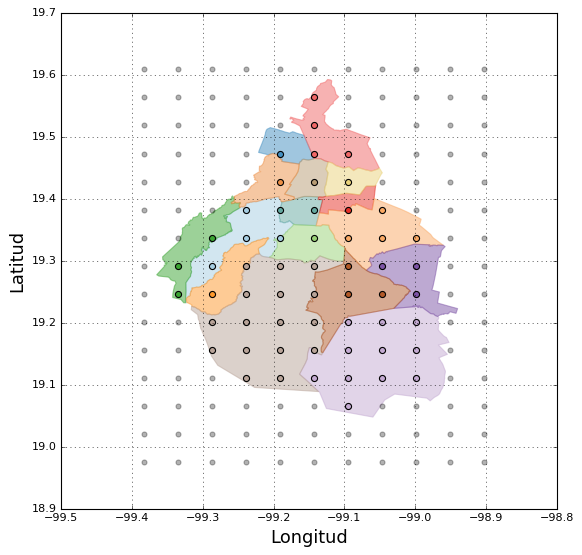

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
patches = []
color=cm.Paired(np.linspace(0,1,16),alpha=0.5)

for i, name in enumerate(delegaciones_names):
    polygon = Polygon(np.array([delegaciones[name].lon , delegaciones[name].lat]).T,closed=True)
    patches.append(polygon)
    
    

collection = PatchCollection(patches)
ax.add_collection(collection)
collection.set_color(color)
ax.autoscale_view()

ax.scatter(xlong[0, 5:20, 34:45], xlat[0, 5:20, 34:45], c = 'k', alpha=0.3)

for j, name in enumerate(delegaciones_names):
    for i in range(0, len(delegaciones[name].nx)):
        ix = delegaciones[name].nx[i]
        iy = delegaciones[name].ny[i]
        ax.scatter(xlong[0, ix, iy], xlat[0, ix, iy], color=color[j], alpha=1, s=30, edgecolors='black')
        


ax.grid()
ax.set_xlabel('Longitud', fontsize=16)
ax.set_ylabel('Latitud', fontsize=16)

### Agrego puntos manualmente que faltan en cada delegación

In [12]:
#puntos exteriores

delegaciones['azcapotzalco'].nx.append(17)
delegaciones['azcapotzalco'].ny.append(38)

delegaciones['gustavo_a_madero'].nx.append(17)
delegaciones['gustavo_a_madero'].ny.append(40)
delegaciones['gustavo_a_madero'].nx.append(16)
delegaciones['gustavo_a_madero'].ny.append(41)

delegaciones['venustiano_carranza'].nx.append(15)
delegaciones['venustiano_carranza'].ny.append(41)

delegaciones['miguel_hidalgo'].nx.append(15)
delegaciones['miguel_hidalgo'].ny.append(37)

delegaciones['cuajimalpa'].nx.append(14)
delegaciones['cuajimalpa'].ny.append(36)
delegaciones['cuajimalpa'].nx.append(13)
delegaciones['cuajimalpa'].ny.append(35)

delegaciones['iztapalapa'].nx.append(14)
delegaciones['iztapalapa'].ny.append(42)

delegaciones['milpa_alta'].nx.append(7)
delegaciones['milpa_alta'].ny.append(41)
delegaciones['milpa_alta'].nx.append(9)
delegaciones['milpa_alta'].ny.append(43)

In [13]:
#puntos compartidos en fronteras

delegaciones['coyoacan'].nx.append(13)
delegaciones['coyoacan'].ny.append(38)

delegaciones['alvaro_obregon'].nx.append(14)
delegaciones['alvaro_obregon'].ny.append(38)
delegaciones['alvaro_obregon'].nx.append(13)
delegaciones['alvaro_obregon'].ny.append(36)

delegaciones['magdalena_contreras'].nx.append(12)
delegaciones['magdalena_contreras'].ny.append(37)

delegaciones['xochimilco'].nx.append(11)
delegaciones['xochimilco'].ny.append(39)
delegaciones['xochimilco'].nx.append(9)
delegaciones['xochimilco'].ny.append(39)

delegaciones['milpa_alta'].nx.append(9)
delegaciones['milpa_alta'].ny.append(39)

delegaciones['iztapalapa'].nx.append(14)
delegaciones['iztapalapa'].ny.append(40)

delegaciones['azcapotzalco'].nx.append(16)
delegaciones['azcapotzalco'].ny.append(39)


In [14]:
#np.array([delegaciones['tlalpan'].nx , delegaciones['tlalpan'].ny], dtype=int).T

### Guarda los puntos de cada delegación

In [16]:
for name in delegaciones_names:
    deleg = np.array([delegaciones[name].nx , delegaciones[name].ny]).T
    stringf = delegaciones_path+"puntos/"+name+".txt"
    np.savetxt(stringf, deleg, fmt="%1d")

In [17]:
delegaciones.keys()

dict_keys(['benito_juarez', 'venustiano_carranza', 'tlalpan', 'azcapotzalco', 'iztacalco', 'coyoacan', 'cuauhtemoc', 'miguel_hidalgo', 'alvaro_obregon', 'iztapalapa', 'gustavo_a_madero', 'cuajimalpa', 'milpa_alta', 'tlahuac', 'xochimilco', 'magdalena_contreras'])

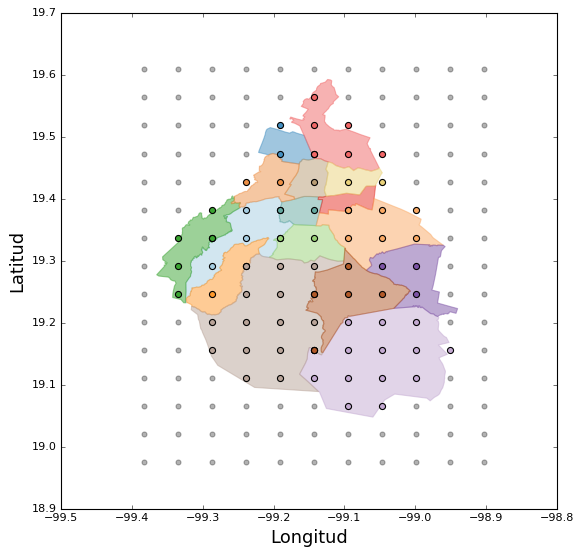

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
patches = []
color=cm.Paired(np.linspace(0,1,16),alpha=0.5)

for i, name in enumerate(delegaciones_names):
    polygon = Polygon(np.array([delegaciones[name].lon , delegaciones[name].lat]).T,closed=True)
    patches.append(polygon)
    
    

collection = PatchCollection(patches)
ax.add_collection(collection)
collection.set_color(color)
ax.autoscale_view()

ax.scatter(xlong[0, 5:20, 34:45], xlat[0, 5:20, 34:45], c = 'k', alpha=0.3)

for j, name in enumerate(delegaciones_names):
    for i in range(0, len(delegaciones[name].nx)):
        ix = delegaciones[name].nx[i]
        iy = delegaciones[name].ny[i]
        ax.scatter(xlong[0, ix, iy], xlat[0, ix, iy], color=color[j], alpha=1, s=30, edgecolors='black')

#nx = 9
#ny = 39
#ax.scatter(xlong[0, nx, ny], xlat[0, nx, ny], c = 'k')

#ax.grid()
ax.axis('auto')
ax.set_xlabel('Longitud', fontsize=16)
ax.set_ylabel('Latitud', fontsize=16)

In [19]:
def arregla_nombres(string):
    
    ix = string.find('_')
    
    if ix != -1:
        
        new_string = string[:ix].capitalize() + ' ' + string[ix+1:].capitalize()
        
    elif ix == -1:
        
        new_string = string.capitalize()
        
    ix = new_string.find('_')
    
    if ix != -1:
        
        new_string = new_string[:ix]+ ' ' + new_string[ix+1:].capitalize()
    
    return new_string

In [20]:
#Lista con los nombre bien escritos de las delegaciones

Nombres_bien = ['Álvaro Obregón',
 'Azcapotzalco',
 'Benito Juárez',
 'Coyoacán',
 'Cuajimalpa',
 'Cuauhtémoc',
 'Gustavo A. Madero',
 'Iztacalco',
 'Iztapalapa',
 'Magdalena Contreras',
 'Miguel Hidalgo',
 'Milpa Alta',
 'Tláhuac',
 'Tlalpan',
 'Venustiano Carranza',
 'Xochimilco']

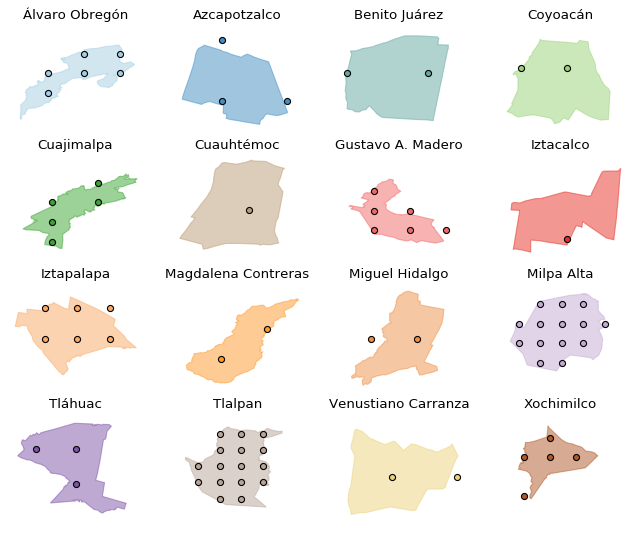

In [21]:
f, axarr = plt.subplots(4, 4)
f.set_size_inches(10,8)
nx = 0

color=cm.Paired(np.linspace(0,1,16),alpha=0.5)

for i, name in enumerate(delegaciones_names):
    patches = []
    polygon = Polygon(np.array([delegaciones[name].lon , delegaciones[name].lat]).T,closed=True)
    patches.append(polygon)
    #print(name)
    if (i)%4 == 0 and i!= 0:
        nx += 1
        
    #print('nx =', nx, ', ny =',i%4)
    #axarr[nx, i%4].plot(delegaciones[name].lon, delegaciones[name].lat)
    collection = PatchCollection(patches)
    axarr[nx, i%4].add_collection(collection)
    collection.set_color(color[i])
    axarr[nx, i%4].autoscale_view()
    
    
    for j in range(0, len(delegaciones[name].nx)):
        ix = delegaciones[name].nx[j]
        iy = delegaciones[name].ny[j]
        axarr[nx, i%4].scatter(xlong[0, ix, iy], xlat[0, ix, iy], color=color[i], alpha=1, s=30, edgecolors='black')
    axarr[nx, i%4].tick_params(axis = 'both', labelbottom='off', labelleft= 'off' , labeltop = 'off', which='both', bottom='off', top='off')
    axarr[nx, i%4].axis('off')
    #axarr[nx, i%4].set_title(arregla_nombres(name))
    axarr[nx, i%4].set_title(Nombres_bien[i])

-------------

# Cálculo del Coeficiente de Ventilación

In [22]:
z = blt.compute_height(ph, phb)

In [23]:
U_m = np.sqrt(u[:, :, :, :]**2 + v[:, :, :, :]**2)

In [24]:
U_m[10,0,30,30]

0.91779935

In [25]:
np.sqrt(u[10,0,30,30]**2 + v[10, 0, 30, 30]**2)

0.9177993170799168

In [26]:
z[0,:,:,:].shape[0]

49

In [27]:
def find_pblh_index(PBLH, HGT, Z):
    """
        find_pblh_index(pblh, hgt, z):
            'PBLH' es la altura de capa de mezcla en un dominio espacial con su dimensión temporal.
            'HGT' es el relieve en el mismo dominio.
            'Z' son todas las alturas para el dominio.
    """
    indexes = np.zeros_like(PBLH, dtype=int) #creates the array that will store the indexes.
    for t in range(0, Z.shape[0]): 
        for i in range(0, Z.shape[2]):
            for j in range(0, Z.shape[3]):
                for h in range(0, Z.shape[1]):
                    
                    if Z[t,h,i,j] > PBLH[t,i,j]+ HGT[0,i,j]: #if the heigth
                        indexes[t,i,j] = h
                        break
    return indexes

In [28]:
a = find_pblh_index(pblh[:], hgt[:], z[:])

In [29]:
def ventilation_coefficient(U, V, PBLH, HGT, Z):
    """
    ventilation_coefficient(U, V, PBLH, HGT, Z)
        Computes the ventilation coefficient for a domain 2D domain with temporal dimension.
    """
    
    vc = np.zeros_like(PBLH) #Creates the new array to store the VC for each point and time.
    U_mean = np.sqrt(U**2 + V**2) #Computes the magnitud of the velocity
    ix_pblh = find_pblh_index(PBLH, HGT, Z) #Computes de height indexes that correspond to the PBLH.

    for t in range(0, Z.shape[0]):
        for i in range(0, Z.shape[2]):
            for j in range(0, Z.shape[3]):
                
                if ix_pblh[t, i, j] == 0: #to avoid nan in the data.
                    vertical_U_mean = np.mean(U_mean[t, 0, i, j])
                else:
                    vertical_U_mean = np.mean(U_mean[t, :ix_pblh[t,i,j], i, j]) #the average of the velocity magnitude in the mixed layer.
                
                vc[t,i,j] = PBLH[t,i,j] * vertical_U_mean #computing the VC.
                
    return vc   

In [30]:
vc = ventilation_coefficient(u[:], v[:], pblh[:], hgt[:], z[:])

In [31]:
cca_ix = blt.near_coord(xlong, xlat, -99.1761, 19.3262)

In [32]:
jqro_ix = blt.near_coord(xlong, xlat, -100.4473, 20.7030)

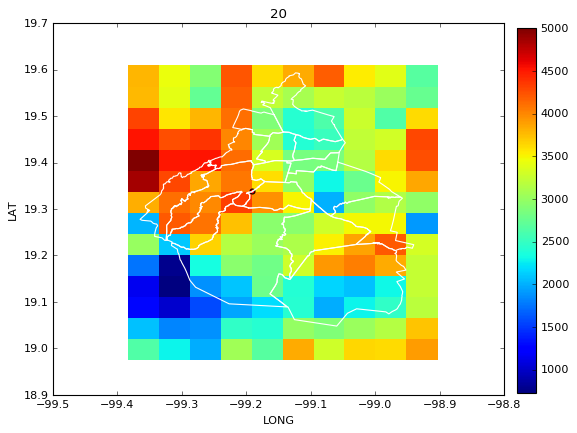

In [33]:
fig = plt.figure(figsize=(8,6))
#fig.suptitle('$N^2 \ (s^{-2})$', fontsize = 14, fontweight='bold', x = 0.8, y = 0.95)
ax = fig.add_subplot(111)
#ax.set_xlim(-99.4, -98.9)
#ax.set_ylim(19, 19.8)
#ax.contourf(XLONG_2[0,:,:], XLAT_2[0,:,:], hgt[0,:,:], cmap='Blues')

t = 20

im = ax.pcolormesh(xlong[0, 5:20, 34:45], xlat[0,5:20,34:45], vc[t,5:20,34:45]) #pblh[18,:,:])
#im = ax.pcolormesh(xlong[0, 5:20, 34:45], xlat[0,5:20,34:45], vc[t,5:20,34:45]) #pblh[18,:,:])
#cs = ax.contour(xlong[0, 7:21,32:43], xlat[0,7:21,32:43], hgt[0,7:21,32:43], colors='k')
#ax.clabel(cs, fontsize=7, inline=1)
ax.scatter(xlong[0,cca_ix[0],cca_ix[1]], xlat[0,cca_ix[0],cca_ix[1]], c = 'r')
#ax.scatter(xlong[0,jqro_ix[0],jqro_ix[1]], xlat[0,jqro_ix[0],jqro_ix[1]], c = 'r')

for name in delegaciones_names:
    ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='white')

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title(t)

In [34]:
t_range = range(0,54)

------------
# Interpolando los VC al dominio

In [35]:
u.shape

(54, 49, 51, 64)

In [36]:
def interpolate_field(x_range, y_range, XLONG_field, XLAT_field, field, Kind = 'linear'):

    '''
    interpolate_field(x_range, y_range, XLONG_field, XLAT_field, field, Kind = 'linear')
        
        Hola. Aquí debe haber una descripción de la función, pero no la hay... Lo siento mucho.

    '''
    #L = []
    nx = len(x_range)
    ny = len(y_range)
    x_old = XLONG_field[0,0,:]
    y_old = XLAT_field[0,:,0]
    
    if len(field.shape) == 4:
        field_shape = (field.shape[0], field.shape[1], nx, ny)
        field_out = np.zeros(field_shape, dtype='float32')
        #print(field_out.shape)
        
        for t in range(0, field.shape[0]):
            for h in range(0, field.shape[1]):

                f = interpolate.interp2d(x_old, y_old, field[t, h, :, :], kind = Kind)
                field_out[t, h, :, :] = f(x_range, y_range).T
                #L.append(f(x,y))
        
    elif len(field.shape) == 3:
        field_shape = (field.shape[0], nx, ny)
        field_out = np.zeros(field_shape, dtype='float32')
        #print(field.shape)
        #print(field_out.shape)
        
        for t in range(0, field.shape[0]):

            f = interpolate.interp2d(x_old, y_old, field[t, :, :], kind = Kind)
            field_out[t, :, :] = f(x_range, y_range).T
            #L.append(f(x,y))
                    
    return field_out

In [37]:
nx = 51*2
ny = 64*2

In [38]:
x_range = np.linspace(xlong[0, :, 0].min(), xlong[0,0, :].max(), nx)
y_range = np.linspace(xlat[0, 0, :].min(), xlat[0,:, 0].max(), ny)

In [39]:
new_xlong, new_xlat = np.meshgrid(x_range, y_range, indexing='ij')

In [40]:
new_xlong.shape

(102, 128)

In [41]:
new_vc = interpolate_field(x_range, y_range, xlong, xlat, vc)

In [42]:
new_vc[6:30,:,:].shape

(24, 102, 128)

In [43]:
xlong[0,0,:].min(), xlong[0,0,:].max()
xlat[0,:,0].min(), xlat[0,:,0].max()

(18.748367, 21.003204)

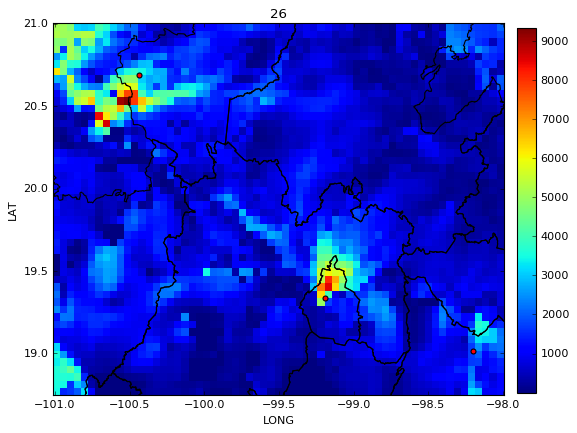

In [44]:
fig = plt.figure(figsize=(8,6))
#fig.suptitle('$N^2 \ (s^{-2})$', fontsize = 14, fontweight='bold', x = 0.8, y = 0.95)
ax = fig.add_subplot(111)
ax.set_xlim(xlong[0,0,:].min(), xlong[0,0,:].max())
ax.set_ylim(xlat[0,:,0].min(), xlat[0,:,0].max())
#ax.contourf(XLONG_2[0,:,:], XLAT_2[0,:,:], hgt[0,:,:], cmap='Blues')

t = 26

im = ax.pcolormesh(xlong[0, :, :], xlat[0,:,:], vc[t,:,:]) #pblh[18,:,:])
#im = ax.pcolormesh(xlong[0, 5:20, 34:45], xlat[0,5:20,34:45], vc[t,5:20,34:45]) #pblh[18,:,:])
#cs = ax.contour(xlong[0, 7:21,32:43], xlat[0,7:21,32:43], hgt[0,7:21,32:43], colors='k')
#ax.clabel(cs, fontsize=7, inline=1)
ax.scatter(xlong[0,cca_ix[0],cca_ix[1]], xlat[0,cca_ix[0],cca_ix[1]], c = 'r')
ax.scatter(xlong[0,jqro_ix[0],jqro_ix[1]], xlat[0,jqro_ix[0],jqro_ix[1]], c = 'r')
ax.scatter(-98.198993, 19.012326, c = 'r')

#for name in delegaciones_names:
#    ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='white')
    
for name in estados_names:
    ax.plot(estados[name].lon, estados[name].lat, c='k')

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title(t)

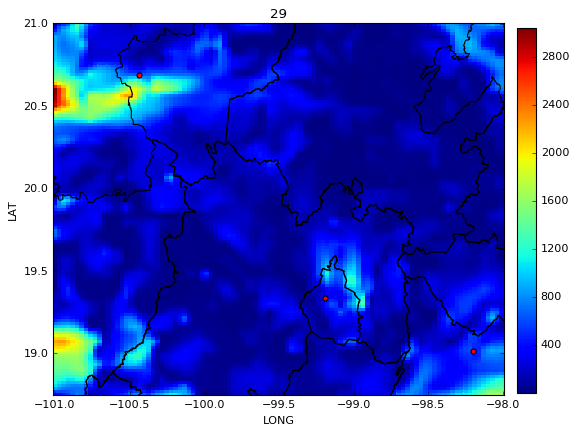

In [45]:
fig = plt.figure(figsize=(8,6))
#fig.suptitle('$N^2 \ (s^{-2})$', fontsize = 14, fontweight='bold', x = 0.8, y = 0.95)
ax = fig.add_subplot(111)
#ax.set_xlim(-99.4, -98.9)
#ax.set_ylim(19, 19.8)
#ax.contourf(XLONG_2[0,:,:], XLAT_2[0,:,:], hgt[0,:,:], cmap='Blues')
ax.set_xlim(xlong[0,0,:].min(), xlong[0,0,:].max())
ax.set_ylim(xlat[0,:,0].min(), xlat[0,:,0].max())
t = 29

im = ax.pcolormesh(new_xlong, new_xlat, new_vc[t,:,:]) #pblh[18,:,:])
#im = ax.pcolormesh(xlong[0, 5:20, 34:45], xlat[0,5:20,34:45], vc[t,5:20,34:45]) #pblh[18,:,:])
#cs = ax.contour(xlong[0, 7:21,32:43], xlat[0,7:21,32:43], hgt[0,7:21,32:43], colors='k')
#ax.clabel(cs, fontsize=7, inline=1)
#ax.scatter(xlong[0,cca_ix[0],cca_ix[1]], xlat[0,cca_ix[0],cca_ix[1]], c = 'r')
#ax.scatter(xlong[0,jqro_ix[0],jqro_ix[1]], xlat[0,jqro_ix[0],jqro_ix[1]], c = 'r')
#ax.scatter(new_xlong, new_xlat)
#ax.scatter(xlong[0,:,:], xlat[0,:,:])
ax.scatter(xlong[0,cca_ix[0],cca_ix[1]], xlat[0,cca_ix[0],cca_ix[1]], c = 'r')
ax.scatter(xlong[0,jqro_ix[0],jqro_ix[1]], xlat[0,jqro_ix[0],jqro_ix[1]], c = 'r')
ax.scatter(-98.198993, 19.012326, c = 'r')
#for name in delegaciones_names:
#    ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='white')
for name in estados_names:
    ax.plot(estados[name].lon, estados[name].lat, c='k')

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
fig.colorbar(im, cax=cbar_ax)

ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title(t)

-------------
# Puntos en delegaciones con el dominio interpolao

In [46]:
new_delegaciones = {}
for i in delegaciones_names:
    reg = blt.region()
    path = delegaciones_path + i + ".xy"
    blt.read_region(reg, path)
    new_delegaciones[i] = reg
    

In [47]:
for name in delegaciones_names:
    blt.points_in_region(new_delegaciones[name], new_xlong, new_xlat)

In [48]:
new_delegaciones['coyoacan'].nx

[61, 61, 62, 62, 62, 63, 63, 63]

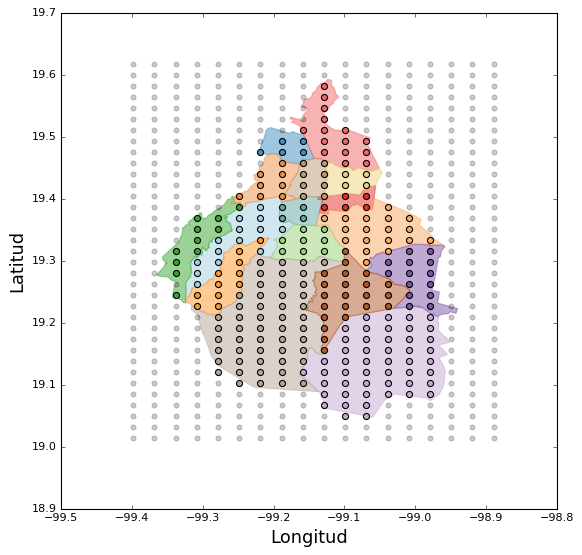

In [49]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
patches = []
color=cm.Paired(np.linspace(0,1,16),alpha=0.5)

for i, name in enumerate(delegaciones_names):
    polygon = Polygon(np.array([delegaciones[name].lon , delegaciones[name].lat]).T,closed=True)
    patches.append(polygon)
    
    

collection = PatchCollection(patches)
ax.add_collection(collection)
collection.set_color(color)
ax.autoscale_view()

ax.scatter(new_xlong[54:72, 15:50], new_xlat[54:72, 15:50], c = 'k', alpha=0.2)

for j, name in enumerate(delegaciones_names):
    for i in range(0, len(new_delegaciones[name].nx)):
        ix = new_delegaciones[name].nx[i]
        
        iy = new_delegaciones[name].ny[i]
        
        ax.scatter(new_xlong[ix, iy], new_xlat[ix, iy], color=color[j], alpha=1, s=30, edgecolors='black')
        

#ax.grid()
ax.axis('auto')
ax.set_xlabel('Longitud', fontsize=16)
ax.set_ylabel('Latitud', fontsize=16)

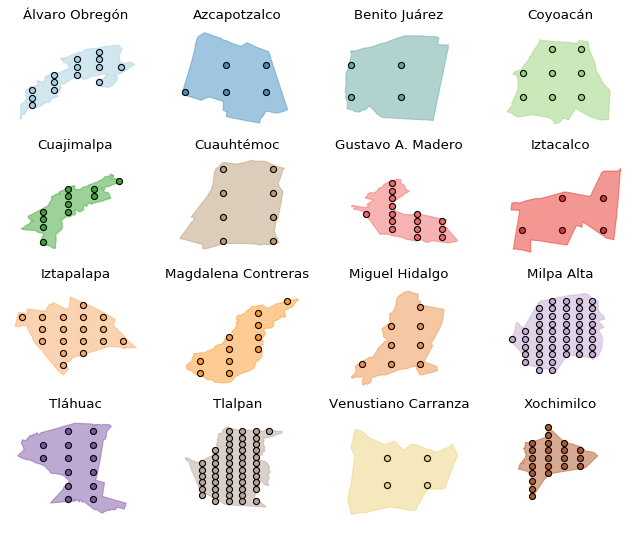

In [50]:
f, axarr = plt.subplots(4, 4)
f.set_size_inches(10,8)
nx = 0

color=cm.Paired(np.linspace(0,1,16),alpha=0.5)

for i, name in enumerate(delegaciones_names):
    patches = []
    polygon = Polygon(np.array([delegaciones[name].lon , delegaciones[name].lat]).T,closed=True)
    patches.append(polygon)
    #print(name)
    if (i)%4 == 0 and i!= 0:
        nx += 1
        
    #print('nx =', nx, ', ny =',i%4)
    #axarr[nx, i%4].plot(delegaciones[name].lon, delegaciones[name].lat)
    collection = PatchCollection(patches)
    axarr[nx, i%4].add_collection(collection)
    collection.set_color(color[i])
    axarr[nx, i%4].autoscale_view()
    
    
    for j in range(0, len(new_delegaciones[name].nx)):
        ix = new_delegaciones[name].nx[j]
        iy = new_delegaciones[name].ny[j]
        axarr[nx, i%4].scatter(new_xlong[ix, iy], new_xlat[ix, iy], color=color[i], alpha=1, s=30, edgecolors='black')
    axarr[nx, i%4].tick_params(axis = 'both', labelbottom='off', labelleft= 'off' , labeltop = 'off', which='both', bottom='off', top='off')
    axarr[nx, i%4].axis('off')
    #axarr[nx, i%4].set_title(arregla_nombres(name))
    axarr[nx, i%4].set_title(Nombres_bien[i])

In [ ]:
for name in delegaciones_names:
    deleg = np.array([new_delegaciones[name].nx , new_delegaciones[name].ny]).T
    stringf = delegaciones_path+"puntos/"+name+".ij"
    np.savetxt(stringf, deleg, fmt="%1d")

In [87]:
tfile...

SyntaxError: invalid syntax (<ipython-input-87-1164a50714fe>, line 1)

---------------

# Animar los datos de VC en el dominio

In [ ]:
def animar(xm, ym, S, HGT, t):
    fig, axis = plt.subplots(figsize=(8,6))
    p = axis.pcolormesh(xm, ym, S[0,:,:], norm= colors.Normalize(vmin=0,vmax=S.max())) 
    #axis.set_xlim(-99.4, -98.9)
    #axis.set_ylim(19, 19.8)
     
    #cbar_ax = fig.add_axes([.91, 0.13, 0.03, 0.76])
    cbar = fig.colorbar(p)
    
    #axis.contour(xm, ym, HGT[0,:,:], colors='k')
    
    for name in delegaciones_names:
            axis.plot(delegaciones[name].lon, delegaciones[name].lat, c='white')
            
    #cbar.set_label('Ventilation Coefficient', rotation=270, fontsize = 16, x = .1)
    tx = axis.set_title(str(t[0]))

    def init():
        print('update init')
        p.set_array(np.ravel(S[0,:-1,:-1]))
        #axis.contour(xm, ym, HGT[0,:,:], colors='k')
        for name in delegaciones_names:
            axis.plot(delegaciones[name].lon, delegaciones[name].lat, c='white')
        tx.set_text('VC. Local hour ' + str(t[0] - 6))
        return p

    def update(frame):
        #vmin = np.min(S[frame])
        #vmax = np.max(S[frame])

        time_str = str(t[frame] - 6)
        p.set_array(np.ravel(S[frame, :-1, :-1]))
        #axis.contour(xm, ym, HGT[0,:,:], colors='k')
        for name in delegaciones_names:
            axis.plot(delegaciones[name].lon, delegaciones[name].lat, c='white')
        
        #p.set_clim(vmin, vmax)
        #plt.title(str(t[frame]))
        axis.set_xlabel('Longitude', fontsize = 18)
        axis.set_ylabel('Latitude', fontsize = 18)
        #tx.set_text('t = ' + str(t[frame]))
        tx.set_text('VC. Local hour ' + time_str )
        #plt.title('Temperatura')

        return p

    anim = animation.FuncAnimation(fig, update, frames= [i for i in range(1,len(S))],  blit = False)
    #plt.show()
    return anim

In [ ]:
anima_T = animar(xlong[0, 5:20, 34:45], xlat[0,5:20,34:45], vc[6:,5:20,34:45], hgt[:,5:20,34:45], range(6,54))

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5,  bitrate=1000)
anima_T.save('vc_df.mp4',writer=writer)

In [ ]:
plt.plot(vc[6:, 13, 38])

In [ ]:
alturas = np.zeros(54)
for t in range(0,54):
    alturas[t] = z[t, a[t,13,38], 13, 38]

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(alturas, )
ax.plot(pblh[:, 13, 38] + hgt[0, 13,38])